In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

# DataSet

In [5]:
data = pd.read_csv('celkove_hodnotenie_2017-18.csv', encoding="cp1250")

In [6]:
data = data.rename(columns={"ď»ż\"ID\"": "id"}).set_index('id').sort_index()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3778 entries, 1 to 4374
Data columns (total 23 columns):
kraj                          3778 non-null object
okres                         3778 non-null object
zriadovatel                   3778 non-null object
druh_skoly                    3769 non-null object
jazyk                         3778 non-null object
typ_skoly                     3778 non-null object
nazov                         3778 non-null object
ulica                         3778 non-null object
obec                          3778 non-null object
PSC                           3778 non-null int64
celkove_hodnotenie            1921 non-null object
maturity                      655 non-null object
testovanie9                   1284 non-null object
matematika                    1939 non-null object
vyucovaci_jazyk               1947 non-null object
cudzie_jazyky                 663 non-null object
mimoriadne_vysledky           2994 non-null object
nezamestnanost_absolventov   

In [8]:
sorted_prim_school_data = data[data['druh_skoly']=='Základná škola'].sort_values(by=['celkove_hodnotenie'])

In [9]:
sorted_prim_school_data = sorted_prim_school_data.dropna(subset=['celkove_hodnotenie'])

In [10]:
sorted_prim_school_data.celkove_hodnotenie.count()

1276

In [11]:
sorted_prim_school_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 3182 to 3580
Data columns (total 23 columns):
kraj                          1276 non-null object
okres                         1276 non-null object
zriadovatel                   1276 non-null object
druh_skoly                    1276 non-null object
jazyk                         1276 non-null object
typ_skoly                     1276 non-null object
nazov                         1276 non-null object
ulica                         1276 non-null object
obec                          1276 non-null object
PSC                           1276 non-null int64
celkove_hodnotenie            1276 non-null object
maturity                      0 non-null object
testovanie9                   1276 non-null object
matematika                    1276 non-null object
vyucovaci_jazyk               1276 non-null object
cudzie_jazyky                 0 non-null object
mimoriadne_vysledky           1276 non-null object
nezamestnanost_absolventov    

# Crawler
## Crawler code

In [12]:
def get_school_info(url):
    r = requests.get("http://skoly.ineko.sk/skola/?ID={}".format(url)) 
    soup = BeautifulSoup(r.content, 'lxml') 
    total_students = int(soup.find_all("div", class_="zu-1")[0].span.string.strip())
    underpriv_students = int(soup.find_all("div", class_="zu-2")[0].span.string.strip())
    return {"total_students":total_students, "underpriv_students":underpriv_students}

## Crawler usage

In [13]:
sorted_prim_school_data['total_students'] = np.NaN
sorted_prim_school_data['underpriv_students'] = np.NaN
sorted_prim_school_data['to_be'] = np.NaN

In [14]:
sorted_school_ids = sorted_prim_school_data.index

In [34]:
count = 0
for i in sorted_school_ids[:100]: 
    school_info = get_school_info(i)
    sorted_prim_school_data.loc[sorted_prim_school_data.index==i, 'total_students'] = school_info['total_students']
    sorted_prim_school_data.loc[sorted_prim_school_data.index==i, 'underpriv_students'] = school_info['underpriv_students']
    count += 1
    print("School number {}".format(count))

School number 1
School number 2
School number 3
School number 4
School number 5
School number 6
School number 7
School number 8
School number 9
School number 10
School number 11
School number 12
School number 13
School number 14
School number 15
School number 16
School number 17
School number 18
School number 19
School number 20
School number 21
School number 22
School number 23
School number 24
School number 25
School number 26
School number 27
School number 28
School number 29
School number 30
School number 31
School number 32
School number 33
School number 34
School number 35
School number 36
School number 37
School number 38
School number 39
School number 40
School number 41
School number 42
School number 43
School number 44
School number 45
School number 46
School number 47
School number 48
School number 49
School number 50
School number 51
School number 52
School number 53
School number 54
School number 55
School number 56
School number 57
School number 58
School number 59
School

In [15]:
to_be_schools = sorted_prim_school_data.head(100)
# to_be_schools = sorted_prim_school_data[sorted_prim_school_data.to_be.notna()]

In [16]:
to_be_schools.kraj.value_counts()

Košický            36
Prešovský          25
Banskobystrický    21
Nitriansky         10
Trnavský            4
Bratislavský        3
Žilinský            1
Name: kraj, dtype: int64

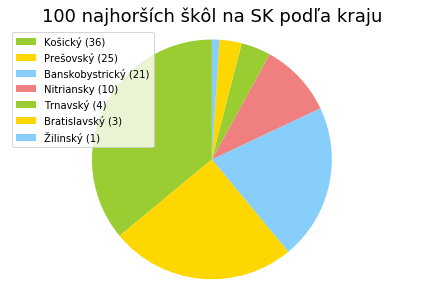

In [17]:
school_region = to_be_schools.kraj.value_counts().index
school_counts = to_be_schools.kraj.value_counts().tolist()

labels = ['{} ({})'.format(first, second) for first, second in zip(school_region, school_counts)]
sizes = school_counts
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title("100 najhorších škôl na SK podľa kraju", fontsize=18)
plt.show()

In [18]:
to_be_schools

,kraj,okres,zriadovatel,druh_skoly,jazyk,typ_skoly,nazov,ulica,obec,PSC,...,mimoriadne_vysledky,nezamestnanost_absolventov,vysledky_inspekcie,ucasti_na_sutaziach,prijimanie_na_VS,pedagogicky_zbor,financne_zdroje,total_students,underpriv_students,to_be
id,,,,,,,,,,,,,,,,,,,,,
3182,Prešovský,Sabinov,Obec,Základná škola,Slovenský,Základná škola,Základná škola,Jarovnice 192,Jarovnice,8263,...,0,NaN,NaN,NaN,NaN,"1,77000694274902","7,02163848876953",NaN,NaN,NaN
3280,Prešovský,Stará Ľubovňa,Obec,Základná škola,Slovenský,Základná škola,Základná škola s MŠ,Lomnička 29,Lomnička,6503,...,0,NaN,NaN,NaN,NaN,"3,80473747253418","5,31586494445801",NaN,NaN,NaN
2842,Prešovský,Kežmarok,Obec,Základná škola,Slovenský,Základná škola,Základná škola s MŠ,Rakúsy 81,Rakúsy,5976,...,0,NaN,NaN,NaN,NaN,"3,58753128051758","6,19759140014648",NaN,NaN,NaN
3816,Košický,Michalovce,Obec,Základná škola,Slovenský,Základná škola,Základná škola s MŠ,Žbince 145,Žbince,7216,...,0,NaN,"4,78777236938477",NaN,NaN,"3,9815357208252","6,84388961791992",NaN,NaN,NaN
3157,Prešovský,Prešov,Obec,Základná škola,Slovenský,Základná škola,Základná škola,Tuhrina 4,Tuhrina,8207,...,0,NaN,"3,77458381652832",NaN,NaN,"6,99383010864258","3,207861328125",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3974,Košický,Spišská Nová Ves,Obec,Základná škola,Slovenský,Základná škola,Základná škola,Spišský Hrušov 264,Spišský Hrušov,5363,...,0,NaN,"5,97534217834473",NaN,NaN,"4,89412841796875","5,71300735473633",NaN,NaN,NaN
2812,Prešovský,Kežmarok,Obec,Základná škola,Slovenský,Základná škola,Základná škola,Školská 212,Huncovce,5992,...,0,NaN,NaN,NaN,NaN,"4,38157234191894","5,77512092590332",NaN,NaN,NaN
479,Trnavský,Galanta,Obec,Základná škola,Slovenský,Základná škola,Základná škola,Hlavná 148,Čierny Brod,92508,...,0,NaN,"5,32150077819824",NaN,NaN,"4,27380104064941","5,7614315032959",NaN,NaN,NaN


# New Code

In [2]:
import locale
from locale import atof, atoi
locale.setlocale(locale.LC_NUMERIC, '')

'sk_SK.UTF-8'

In [3]:
data_celkove = pd.read_csv('datasets/celkove_hodnotenie_2018-19.csv', sep=';', encoding="cp1250")
data_polrocne = pd.read_csv('datasets/celkove_hodnotenie_2018-19p.csv', sep=';', encoding="cp1250")
data_doplnujuce = pd.read_csv('datasets/doplnujuce_udaje_2018-19.csv', sep=';', encoding="cp1250")
data_percentily = pd.read_csv('datasets/percentily_2018-19.csv', sep=';', encoding="cp1250")
data_udaje = pd.read_csv('datasets/udaje_2018-19.csv', sep=';', encoding="cp1250")
data_zoznam = pd.read_csv('datasets/zoznam_skol.csv', sep=';', encoding="cp1250")

In [4]:
data = data_celkove.iloc[:, :12] # vyberieme zaujimave stlpce
data = data[data['druh_skoly']=='Základná škola'].sort_values(by=['celkove_hodnotenie']) # zoradenie

In [5]:
data_coordinates = data_zoznam[['ID', 'sur_x', 'sur_y']]
data = data.set_index('ID').join(data_coordinates.set_index('ID'))
data = data.dropna(subset=['sur_x', 'sur_y']) # vymazenie pozorovani bez suradnic
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 3305 to 4210
Data columns (total 13 columns):
kraj                  1452 non-null object
okres                 1452 non-null object
zriadovatel           1452 non-null object
druh_skoly            1452 non-null object
jazyk                 1452 non-null object
typ_skoly             1452 non-null object
nazov                 1452 non-null object
ulica                 1452 non-null object
obec                  1452 non-null object
PSC                   1452 non-null int64
celkove_hodnotenie    1274 non-null object
sur_x                 1452 non-null object
sur_y                 1452 non-null object
dtypes: int64(1), object(12)
memory usage: 158.8+ KB


In [6]:
data_isna = data[data.celkove_hodnotenie.isna()]
data_isna

,kraj,okres,zriadovatel,druh_skoly,jazyk,typ_skoly,nazov,ulica,obec,PSC,celkove_hodnotenie,sur_x,sur_y
ID,,,,,,,,,,,,,
3,Bratislavský,Bratislava I,Obec,Základná škola,Maďarský,Základná škola,Základná škola s VJM,Dunajská 13,Bratislava - Staré Mesto,81484,NaN,"17,117","48,1452"
22,Bratislavský,Bratislava I,"Cirkev, cirkevné spoločenstvo",Základná škola,Slovenský,Základná škola,Evanjelická ZŠ,Palisády 57,Bratislava - Staré Mesto,81106,NaN,"17,1061","48,1489"
47,Bratislavský,Bratislava II,Súkromník,Základná škola,Anglický,Základná škola,Súkromná ZŠ Galileo,Dudvážska 6,Bratislava - Podunajské Biskupice,82412,NaN,"17,2147","48,1373"
71,Bratislavský,Bratislava II,"Krajský úrad, Okresný úrad",Základná škola,Slovenský,Základná škola,Základná škola Košická (PYP),Novohradská 3,Bratislava - Ružinov,82109,NaN,"17,1355","48,1471"
92,Bratislavský,Bratislava II,Obec,Základná škola,Maďarský,Základná škola,Základná škola s MŠ,Vetvárska 7,Bratislava - Podunajské Biskupice,82106,NaN,"17,21","48,1248"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,Žilinský,Žilina,Obec,Základná škola,Slovenský,Základná škola,Základná škola s MŠ,Školská 474/5,Kamenná Poruba,1314,NaN,"18,6861","49,0874"
4183,Prešovský,Prešov,Občianske združenia,Základná škola,Slovenský,Základná škola,Súkromná spojená škola European English School...,Solivarská 28,Prešov,8005,NaN,"21,2402","49,0017"
4185,Košický,Košice IV,Súkromník,Základná škola,Slovenský,Základná škola,Súkromná základná škola,Užhorodská 39,Košice - Juh,4011,NaN,"21,2568","48,7095"


In [7]:
# data_isna = data[data.celkove_hodnotenie.isna()] # dataset so skolami, ktore neobsahuju hodnotenie
data = data.dropna(subset=['celkove_hodnotenie']) # vymazenie pozorovani bez celkove_hodnotenie

In [12]:
r = requests.get("http://skoly.ineko.sk/skola/?ID=1035") 

In [35]:
import folium
from folium.plugins import HeatMap

m = folium.Map(
    location=[48.730556, 19.457222],
    zoom_start=8,
    tiles='OpenStreetMap'
)

tooltip = 'Click me!'

radius = 1000

for i, school_id in enumerate(data.index):
    if i < 100:
        color = "red"
    else:
        color = "blue"
    
    folium.Circle(
        radius=radius,
        location=[atof(data.at[school_id, 'sur_y']), atof(data.at[school_id, 'sur_x'])],
        popup='<b>{} {} {}</b><br>Zriaďovateľ: {}<br>Hodnotenie: {}<br><a href="http://skoly.ineko.sk/skola/?ID={}" target="_blank">Link</a>'.format(
            data.at[school_id, 'nazov'],
            data.at[school_id, 'ulica'],
            data.at[school_id, 'obec'],
            data.at[school_id, 'zriadovatel'],
            data.at[school_id, 'celkove_hodnotenie'],
            school_id
        ),        
        icon=folium.Icon(icon='graduation-cap', prefix='fa', color=color),
        fill=True,
        fill_opacity="1",
        color=color
        
    ).add_to(m)
    
    
for i, school_id in enumerate(data_isna.index):
    color = "lightgray"
    
    folium.Circle(
        radius=radius,
        location=[atof(data_isna.at[school_id, 'sur_y']), atof(data_isna.at[school_id, 'sur_x'])],
        popup='<b>{} {} {}</b><br>Zriaďovateľ: {}<br>Hodnotenie: {}<br><a href="http://skoly.ineko.sk/skola/?ID={}" target="_blank">Link</a>'.format(
            data_isna.at[school_id, 'nazov'],
            data_isna.at[school_id, 'ulica'],
            data_isna.at[school_id, 'obec'],
            data_isna.at[school_id, 'zriadovatel'],
            data_isna.at[school_id, 'celkove_hodnotenie'],
            school_id
        ),        
        icon=folium.Icon(icon='graduation-cap', prefix='fa', color=color),
        fill=True,
        fill_opacity="1",
        color=color
        
    ).add_to(m)
    
    
skolenia = ['Kežmarok', 'Spišská Nová Ves', 'Košice', 'Snina', 'Vranov na Topľou',
            'Svidník', 'Bardejov', 'Rožňava hlavná', 'Nitra', 'Rimavská Sobota',
            'Michalovce', 'Levice', 'Bratislava', 'Trnava', 'Banská Bystrica', 'Trenčín',
            'Revúca', 'Námestovo', 'Čadca', 'Plavecký Štvrtok', 'Žilina', 'Nové Zámky']

skolenia = []
geolocator = Nominatim(user_agent="specify_your_app_name_here")

for mesto in skolenia:
    location = geolocator.geocode("{} Slovensko".format(mesto))
    folium.Marker(
        radius=1000,
        location=[location.latitude, location.longitude],
        popup='<b>{}<b>'.format(
            location.address,
        ),        
        icon=folium.Icon(icon='graduation-cap', prefix='fa', color="green"),
        fill=True,
        fill_opacity="1",
        
    ).add_to(m)

# heatmap_data = []
# for school_id in data.index[:200]:
#     school_data = [atof(data.at[school_id, 'sur_y']), atof(data.at[school_id, 'sur_x']), atof(data.at[school_id, 'celkove_hodnotenie'])]
#     heatmap_data.append(school_data)

# heatmap_data

# HeatMap(
#     data = heatmap_data,
#     max_val = 10,
#     radius = 20,
#     gradient = {1: 'red'}

# ).add_to(m)

# heatmap_data = []
# for school_id in data.index[-1:-200:-1]:
#     school_data = [atof(data.at[school_id, 'sur_y']), atof(data.at[school_id, 'sur_x']), atof(data.at[school_id, 'celkove_hodnotenie'])]
#     heatmap_data.append(school_data)

# heatmap_data

# HeatMap(
#     data = heatmap_data,
#     max_val = 10,
#     radius = 20,
#     gradient = {1: 'blue'}

# ).add_to(m)

m
# m._repr_html_()

In [61]:
import folium
from folium.plugins import HeatMap

m = folium.Map(
    location=[48.730556, 19.457222],
    zoom_start=8,
    tiles='OpenStreetMap'
)


heatmap_data = []
for school_id in data.index[:200]:
    school_data = [atof(data.at[school_id, 'sur_y']), atof(data.at[school_id, 'sur_x']), atof(data.at[school_id, 'celkove_hodnotenie'])]
    heatmap_data.append(school_data)

HeatMap(
    data = heatmap_data,
    max_val = 10,
    radius = 20,
    gradient = {1: 'red'}

).add_to(m)

heatmap_data = []
for school_id in data.index[-1:-200:-1]:
    school_data = [atof(data.at[school_id, 'sur_y']), atof(data.at[school_id, 'sur_x']), atof(data.at[school_id, 'celkove_hodnotenie'])]
    heatmap_data.append(school_data)

HeatMap(
    data = heatmap_data,
    max_val = 10,
    radius = 20,
    gradient = {1: 'blue'}

).add_to(m)

m
# m._repr_html_()

In [ ]:
plt.hist(data.celkove_hodnotenie.apply(atof), bins=50)

In [109]:
from folium import FeatureGroup, LayerControl, Map, Marker

m = folium.Map(
    location=[48.730556, 19.457222],
    zoom_start=8,
    tiles=None,
    # tiles='Stamen Terrain'

)

feature_group = FeatureGroup(name='Bod A')
feature_group_2 = FeatureGroup(name='Bod B')
feature_group_3 = FeatureGroup(name='Najlepšie školy')
feature_group_4 = FeatureGroup(name='Najslabsie školy')

feature_group_5 = FeatureGroup(name='New Way', show=False)


Marker(location=[48.730556, 19.457222],
       popup='Timberline Lodge').add_to(feature_group)

Marker(location=[48.730556, 18.457222],
       popup='Timberline Lodge').add_to(feature_group_2)


folium.TileLayer('OpenStreetMap', name='OpenStreetMap').add_to(m)
folium.TileLayer('CartoDB Positron', name='CartoDB Positron').add_to(m)
folium.TileLayer('CartoDB dark_matter', name='CartoDB Dark Matter').add_to(m)
folium.TileLayer('Stamen Terrain', name='Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner', name='Stamen Toner').add_to(m)
folium.TileLayer('Stamen Watercolor', name='Stamen Watercolor').add_to(m)





heatmap_data = []
for school_id in data.index[:200]:
    school_data = [atof(data.at[school_id, 'sur_y']), atof(data.at[school_id, 'sur_x']), atof(data.at[school_id, 'celkove_hodnotenie'])]
    heatmap_data.append(school_data)

HeatMap(
    data = heatmap_data,
    max_val = 10,
    radius = 20,
    gradient = {1: 'red'}

).add_to(feature_group_4)

heatmap_data = []
for school_id in data.index[-1:-200:-1]:
    school_data = [atof(data.at[school_id, 'sur_y']), atof(data.at[school_id, 'sur_x']), atof(data.at[school_id, 'celkove_hodnotenie'])]
    heatmap_data.append(school_data)

HeatMap(
    data = heatmap_data,
    max_val = 10,
    radius = 20,
    gradient = {1: 'blue'}

).add_to(feature_group_3)





heatmap_data = []
for school_id in data.index[0:]:
    school_data = [atof(data.at[school_id, 'sur_y']), atof(data.at[school_id, 'sur_x']), atof(data.at[school_id, 'celkove_hodnotenie'])]
    heatmap_data.append(school_data)

HeatMap(
    data = heatmap_data,
    max_val = 10,
    radius = 20,
    gradient = {0.3: 'blue', 1:'green'}

).add_to(feature_group_5)

feature_group.add_to(m)
feature_group_2.add_to(m)
feature_group_3.add_to(m)
feature_group_4.add_to(m)
feature_group_5.add_to(m)

LayerControl().add_to(m)

m

In [95]:
heatmap_data

[[49.312, 20.7063, 0.0],
 [49.0575, 21.0715, 0.0],
 [49.1865, 20.3794, 0.0349272519350052],
 [48.8962, 21.4006, 0.0456496596336365],
 [48.6967, 21.224, 0.0973299980163574],
 [48.6717, 21.8897, 0.160405421257019],
 [49.1568, 20.3673, 0.162038946151733],
 [48.6109, 21.7233, 0.206573033332825],
 [48.2979, 18.0821, 0.453874444961548],
 [48.5767, 21.6327, 0.45840048789978],
 [49.0575, 21.0716, 0.507052564620972],
 [48.8314, 21.4173, 0.513473558425903],
 [48.7052, 18.9223, 0.532158041000366],
 [48.9593, 20.4725, 0.714605188369751],
 [49.3689, 21.4688, 0.794175577163696],
 [49.3654, 21.6872, 0.812573051452637],
 [48.8519, 20.188, 0.816504192352295],
 [48.5783, 21.8515, 0.829023265838623],
 [48.6768, 21.304, 0.864910888671875],
 [48.7166, 21.4396, 0.88779182434082],
 [48.4783, 20.2728, 0.956863498687744],
 [48.8128, 20.7117, 0.964201831817627],
 [48.8398, 20.6243, 0.981322383880615],
 [48.299, 19.9803, 1.04193820953369],
 [48.3754, 16.9972, 1.08065452575684],
 [48.9167, 20.6233, 1.099152469635